#### In the previous analysis, we explored the patterns within data and relationships between features other than the review texts themselves. In this notebook, we would focus on the review texts and try to derive meanful insights from them.

In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Recalled that we saved the cleaned reviews at the end of last analysis, so we are going to load them directly here

In [2]:
reviews = pd.read_csv('../Data/Cleaned_Acadia_Reviews.csv')
reviews.head()

,CreatedDate,PublishedDate,Username,Hometown,NumUserGeneratedContent,NumHelpfulVote,Review_Title,Review_TripDate,Review_TripType,Review_Text,Review_Rating,Review_HelpfulVotes
0,2020-10-12,2020-10-12,mplegal,"Orlando, Florida",227,46,Nature Lovers’ Shanghai-la!,2020-10-31,COUPLES,Visiting Acadia National Park specifically in ...,5,0
1,2020-10-11,2020-10-11,carolHjones,"Columbus, Georgia",31,21,Great trip,2020-10-31,FAMILY,Beautiful park. Definitely rent bikes in Bar H...,5,0
2,2020-10-11,2020-10-11,rydharter,"Austin, Texas",2,0,Amazing (Civid-Time) Road Trip,2020-10-31,NaN,Acadia was part of my first visit to New Engla...,5,0
3,2020-10-10,2020-10-10,JohnPatsi,"Tullahoma, Tennessee",559,94,Beautiful piece of God’s nature,2020-10-31,COUPLES,Beautiful piece of God’s nature situated along...,5,0
4,2020-10-06,2020-10-06,384katiec,"Indianapolis, Indiana",300,58,Great visit!,2020-09-30,NaN,"As the park ranger explained, this is the swis...",5,0


In [3]:
review_texts = reviews.loc[:, ['Review_Title', 'Review_Text']]

In [4]:
review_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  1757 non-null   object
 1   Review_Text   1757 non-null   object
dtypes: object(2)
memory usage: 27.6+ KB


#### We would like to start our analysis by checking out the most frequently appearing words and see if there are interesting findings

First, let's remove punctuations since we only need words here

In [5]:
def RemovePunctuation(text):
    table = ''.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = text.replace('’', '')
    return text

In [6]:
review_words = review_texts.copy()
review_words['Review_Title'] = review_words['Review_Title'].map(RemovePunctuation)
review_words['Review_Text'] = review_words['Review_Text'].map(RemovePunctuation)

In [7]:
review_words.head()

,Review_Title,Review_Text
0,Nature Lovers Shanghaila,Visiting Acadia National Park specifically in ...
1,Great trip,Beautiful park Definitely rent bikes in Bar Ha...
2,Amazing CividTime Road Trip,Acadia was part of my first visit to New Engla...
3,Beautiful piece of Gods nature,Beautiful piece of Gods nature situated along ...
4,Great visit,As the park ranger explained this is the swiss...


Next, let's remove stopwords. Stopwords are common words that bear little information.

In [8]:
def CleanStopWordsToList(text):
    stop = stopwords.words('english') #English stop words
    
    wordlist = text.lower().split()
    wordlist = list(filter(lambda x: x not in stop, wordlist))
    
    return wordlist

In [9]:
review_title = review_words['Review_Title'].map(CleanStopWordsToList)
review_text = review_words['Review_Text'].map(CleanStopWordsToList)

In [10]:
#Making one long list as a result of concatenating all review titles/texts
review_title_all = []
for item in review_title:
    review_title_all += item
    
review_text_all = []
for item in review_text:
    review_text_all += item

Finally, let's view the results of most frequently appearing words by generating a word cloud

In [11]:
def GenerateWordCloud(wordlist, colormap = 'viridis'):
    wordcount = {}
    for word in wordlist:
        wordcount[word] = wordcount.get(word, 0) + 1
    
    wc = WordCloud(width=2000, height=1500, background_color='white', min_font_size=6, colormap = colormap).generate_from_frequencies(wordcount)
    
    plt.figure(figsize = (12, 9))
    plt.axis('off')
    plt.imshow(wc)

**For review titles**

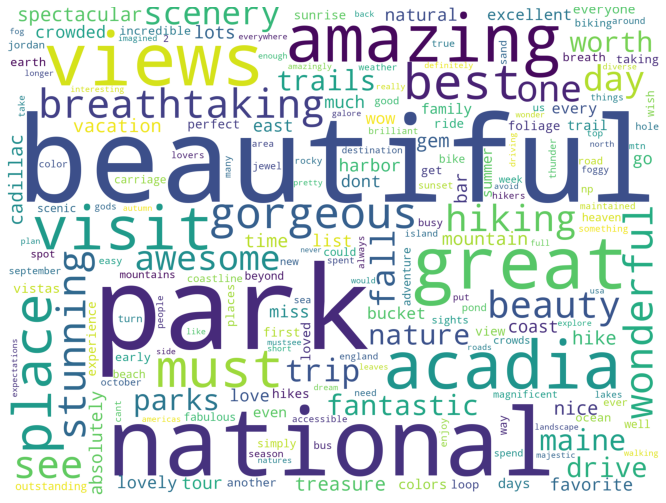

In [12]:
GenerateWordCloud(review_title_all, colormap = 'viridis')

Of course, because the reviews are about Acadia National Park, it dominates the review titles. Let's remove the national park name from review titles and review texts and try again.

In [13]:
review_title_all = [word for word in review_title_all if word not in ['acadia', 'national', 'park']]
review_text_all = [word for word in review_text_all if word not in ['acadia', 'national', 'park']]

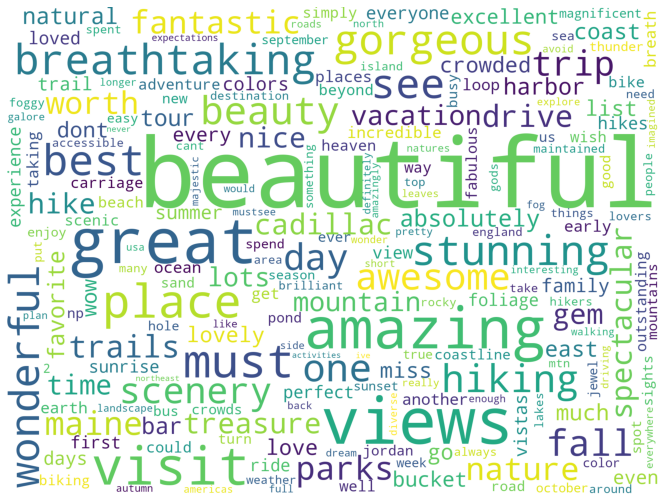

In [14]:
#For Review Titles
GenerateWordCloud(review_title_all, colormap = 'viridis')

#### It is interesting to see that the most prevalent words among the review titles are "beautiful" along with other praising words. Maybe TripAdvisor can do the same analysis for all the places and provide tags for individual places based on word prevalence from reviews titles/contents?

#### Speaking of review contents, let's visualize it using a word cloud also.

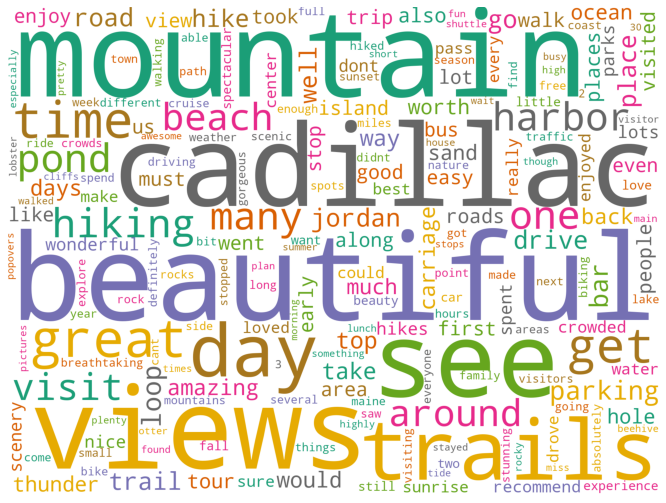

In [15]:
GenerateWordCloud(review_text_all, colormap = 'Dark2')

#### One word might stands out to you - "cadillac". It is not the car, but the Cadillac Mountain, which is one of the major places to go for Acadia National Park. (So it must be a place worth seeing when everybody is writting about it? But note, parking is also a big word in the word cloud so you might have to research first how crowded it is up there :))

#### So... mostly praising words from reviews huh? This makes me kind of want to see what some of the top words are for neutral or negative reviews (ratings of 3 or less). We would find out below:

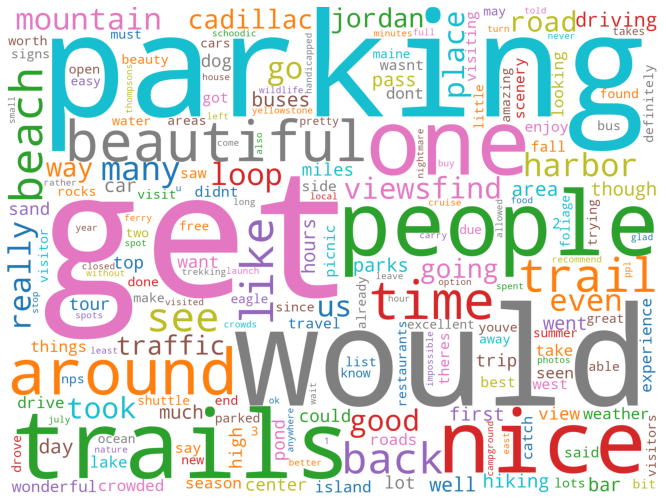

In [16]:
reviews_sub = reviews.loc[reviews['Review_Rating'] <= 3]
review_texts_sub = reviews_sub.loc[:, ['Review_Title', 'Review_Text']]

review_words_sub = review_texts_sub.copy()
review_words_sub['Review_Title'] = review_words_sub['Review_Title'].map(RemovePunctuation)
review_words_sub['Review_Text'] = review_words_sub['Review_Text'].map(RemovePunctuation)

review_title_sub = review_words_sub['Review_Title'].map(CleanStopWordsToList)
review_text_sub = review_words_sub['Review_Text'].map(CleanStopWordsToList)

#Making one long list as a result of concatenating all review titles/texts
review_title_all_sub = []
for item in review_title_sub:
    review_title_all_sub += item
    
review_text_all_sub = []
for item in review_text_sub:
    review_text_all_sub += item
    
review_title_all_sub = [word for word in review_title_all_sub if word not in ['acadia', 'national', 'park']]
review_text_all_sub = [word for word in review_text_all_sub if word not in ['acadia', 'national', 'park']]

GenerateWordCloud(review_text_all_sub, colormap = 'tab10')

#### okay, nothing too negative but as we said before, parking might be a huge problem... (at least somehow it is a main theme)

---

#### Next, we would try to perform sentiment analysis using review texts - specifically, we would try to see if we could predict review ratings using review texts. However, the following analysis would be subject to the following limitations:
1. We do not have enough data available thus we might not have high-accuracy results.
2. The outcome does not generate much business value - because reviewers almost always give ratings so there are little business incentives to predict the ratings comparing to, for example, using review texts to analyze if it affects on users' spending decisions on TripAdvisor. However, because we do not have additional features, we are not able to perform those analysis.

#### Thus, the following analysis is more focused on methodologies of sentiment analysis

#### But first, let's review the distribution of review ratings

In [18]:
reviews['Review_Rating'].value_counts()

5    1577
4     143
3      28
2       6
1       3
Name: Review_Rating, dtype: int64

Note that the review rating distribution is highly skewed so it is not feasible to train on this set of data. So we would stop here for now.

We can pick the analysis up in the future if we found a less :) popular national park that has more evenly distributed data or when we have lots of data where we aggregate all the national parks' data together, but that's the work for another day. For now, if you need a sneak peak on how text classification is done, you could find another notebook I have on [real vs. fake news detection](https://github.com/tonyychen/Projects/blob/master/Portfolio%20Projects/Anomaly%20Detection%20using%20RNN.ipynb)